In [1]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

warnings.filterwarnings(action="ignore")

In [2]:
%matplotlib inline

In [3]:
from src.eda_src import get_bad_rate, calculate_ks_corr

In [4]:
X_train = pd.read_csv('data/train.csv')

In [5]:
X_train.head().T

,0,1,2,3,4
id,8522,7864,3522,8694,2306
ship_mode,Second Class,Standard Class,Standard Class,Standard Class,Second Class
segment,Consumer,Corporate,Consumer,Consumer,Home Office
country,United States,United States,United States,United States,United States
city,Everett,Los Angeles,New York City,Los Angeles,San Francisco
state,Massachusetts,California,New York,California,California
postal_code,2149,90036,10035,90045,94110
region,East,West,East,West,West
category,Office Supplies,Furniture,Office Supplies,Office Supplies,Furniture
sub_category,Art,Chairs,Storage,Art,Bookcases


In [6]:
X_train.shape

(7173, 14)

In [7]:
X_train.describe()

,id,postal_code,sales,quantity,discount,profit
count,7173.000000,7173.000000,7173.000000,7173.000000,7173.000000,7173.000000
mean,4981.020772,57372.577861,233.661716,3.810540,0.132447,36.220375
std,2885.410698,33145.587637,594.146828,2.236801,0.200767,222.338027
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-3839.990400
25%,2483.000000,22980.000000,17.940000,2.000000,0.000000,2.822400
50%,4961.000000,68104.000000,55.980000,3.000000,0.000000,10.179000
75%,7498.000000,90032.000000,215.968000,5.000000,0.200000,33.874400
max,9994.000000,97756.000000,17499.950000,14.000000,0.800000,8399.976000


In [8]:
print(X_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7173 entries, 0 to 7172
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            7173 non-null   int64  
 1   ship_mode     7173 non-null   object 
 2   segment       7173 non-null   object 
 3   country       7173 non-null   object 
 4   city          7173 non-null   object 
 5   state         7173 non-null   object 
 6   postal_code   7173 non-null   int64  
 7   region        7173 non-null   object 
 8   category      7173 non-null   object 
 9   sub_category  7173 non-null   object 
 10  sales         7173 non-null   float64
 11  quantity      7173 non-null   int64  
 12  discount      7173 non-null   float64
 13  profit        7173 non-null   float64
dtypes: float64(3), int64(3), object(8)
memory usage: 784.7+ KB
None


**id** unique id per row

**ship_mode** what mode was used to ship the item: 'First Class', 'Same Day', 'Second Class', 'Standard Class'

**segment** whether the recipient is corporate or consumer

**country** always United States

**city** where the item was shipped (a city in the United States)

**state** where the item was shipped (a state in the United States)

**postal_code** ZIP Code in the United States

**region** region in the United States: 'Central', 'East', 'South', 'West'

**category** type of item: 'Furniture', 'Office Supplies', 'Technology'

**sub_category** sub-type of item: 'Accessories', 'Appliances', 'Art', 'Binders', 'Bookcases', 'Chairs', 'Copiers', 'Envelopes', 'Fasteners', 'Furnishings', 'Labels', 'Machines', 'Paper', 'Phones', 'Storage', 'Supplies', 'Tables'

**sales** sales made for the order (USD)

**quantity** quantity sold of the item

**discount** discount applied to the order(from 0 to 1)

**profit** profit made on the order (USD)

## EDA

We will not consider id and country in our analysis, as id is unique per row and country is the same for the entire dataset (USA).

In [9]:
features = [
        'ship_mode', 'segment', 'country', 'city', 'state', 'postal_code',
        'region', 'category', 'sub_category', 'sales', 'quantity', 'discount'
]

target = 'profit'


In [10]:
X_train = X_train[X_train.columns.drop(['id', 'country'])]

## Numeric features

In [11]:
corr = X_train[['sales', 'discount', 'profit']].corr()
corr.style.background_gradient(cmap='coolwarm')

,sales,discount,profit
sales,1.000000,-0.030771,0.621893
discount,-0.030771,1.000000,-0.205416
profit,0.621893,-0.205416,1.000000


In [12]:
coeficiente, p_valor = stats.spearmanr(
    X_train['sales'], X_train['profit']
)
print("Spearman coefficient for sales x profit:", coeficiente)
print("P-value:", p_valor)

print('\n', '-'*60, '\n')
coeficiente, p_valor = stats.spearmanr(
    X_train['discount'], X_train['profit']
)
print("Spearman coefficient for discount x profit::", coeficiente)
print("P-valor:", p_valor)

Spearman coefficient for sales x profit: 0.5926172743482064
P-value: 0.0

 ------------------------------------------------------------ 

Spearman coefficient for discount x profit:: -0.47344231011508564
P-valor: 0.0


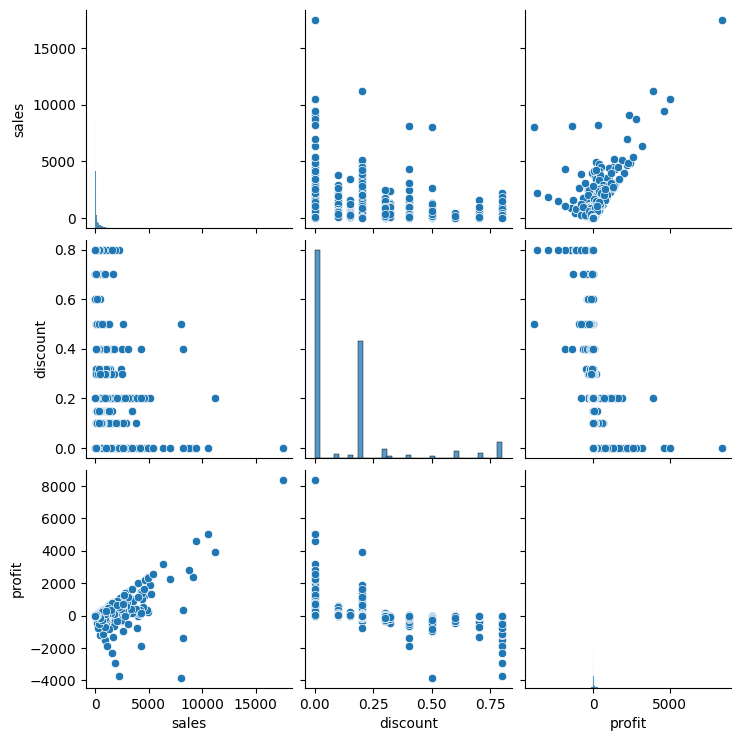

In [13]:
sns.pairplot(X_train[['sales', 'discount', 'profit']])
plt.show()

In [14]:
print('Outliers for each numeric feature:')
Q1 = X_train[['sales', 'discount']].quantile(0.25)
Q3 = X_train[['sales', 'discount']].quantile(0.75)
IQR = Q3 - Q1
((X_train[['sales', 'discount']] < (Q1 - 1.5 * IQR)) | (X_train[['sales', 'discount']] > (Q3 + 1.5 * IQR))).sum()

Outliers for each numeric feature:


sales       829
discount    534
dtype: int64

## Categorical features

Unique values by feature

In [15]:
for feature in X_train.select_dtypes(include=['object','category']).columns.tolist():
    print(f'{feature}: {X_train[feature].nunique()}')
    X_train[feature] = pd.Categorical(X_train[feature], categories=X_train[feature].unique())

ship_mode: 4
segment: 3
city: 396
state: 38
region: 4
category: 3
sub_category: 17


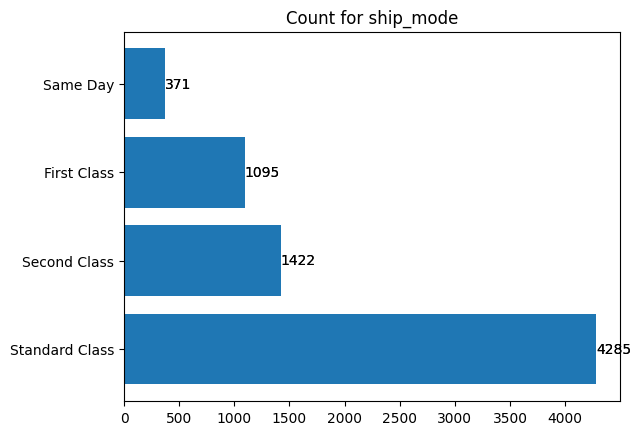

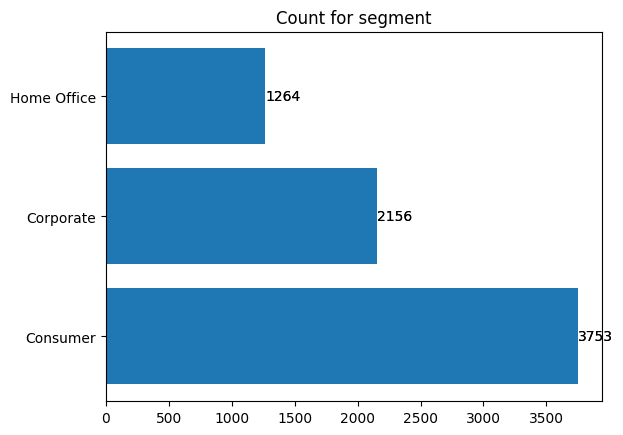

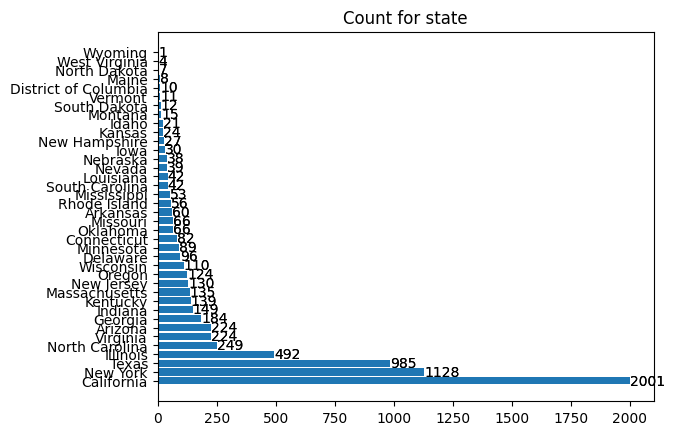

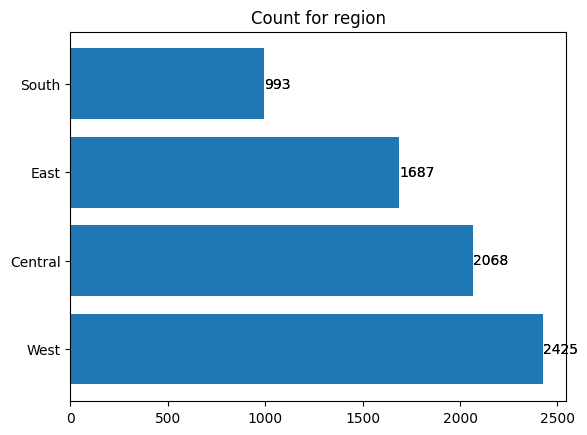

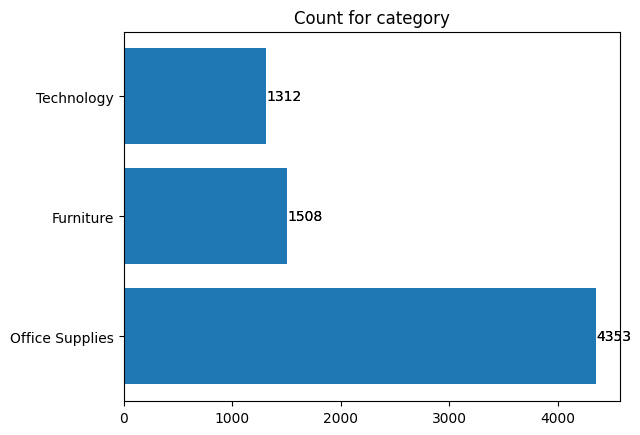

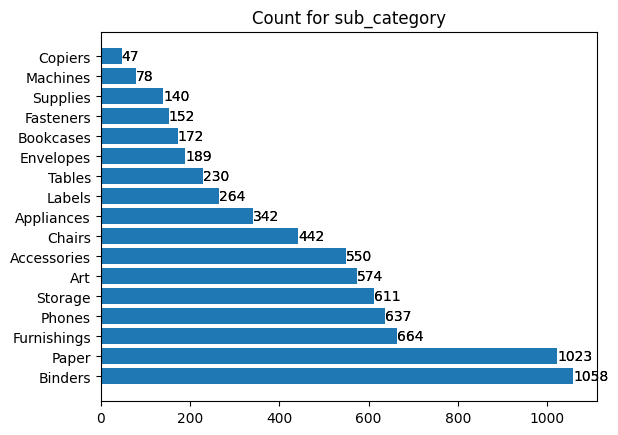

In [16]:
for feature in ['ship_mode', 'segment', 'state', 'region', 'category', 'sub_category']:
    temp = pd.DataFrame(X_train[feature].value_counts()).reset_index()

    fig, ax = plt.subplots()
    bars = ax.barh(temp[feature], temp['count'])

    ax.bar_label(bars)

    ax.set_title(f'Count for {feature}')

    for bars in ax.containers:
        ax.bar_label(bars)

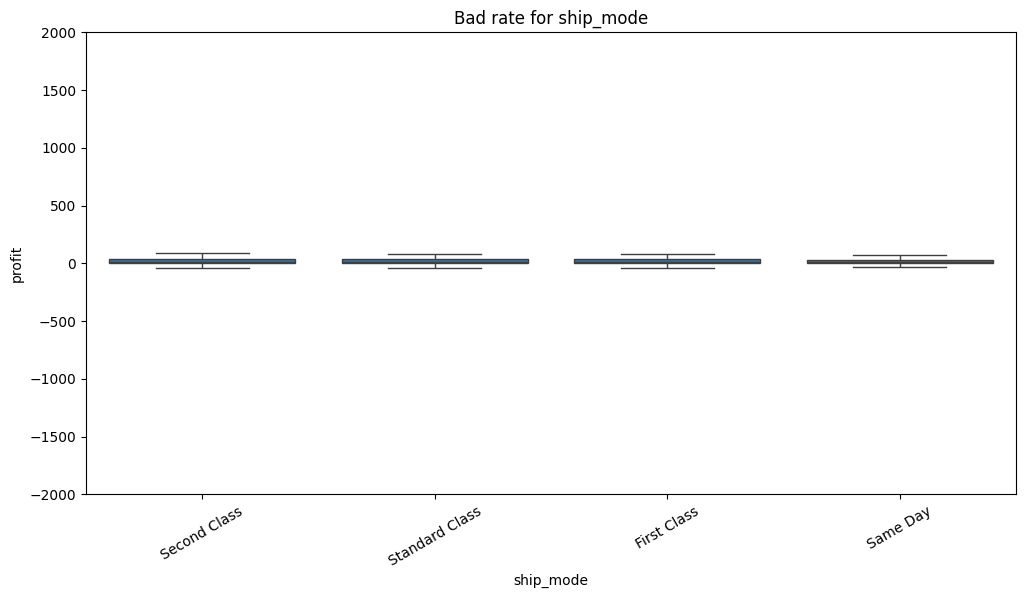

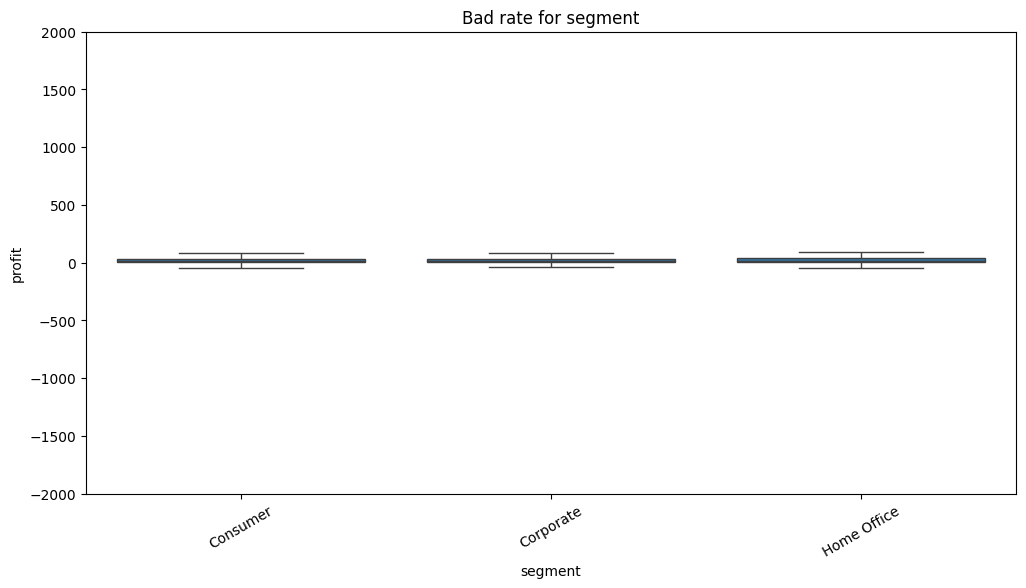

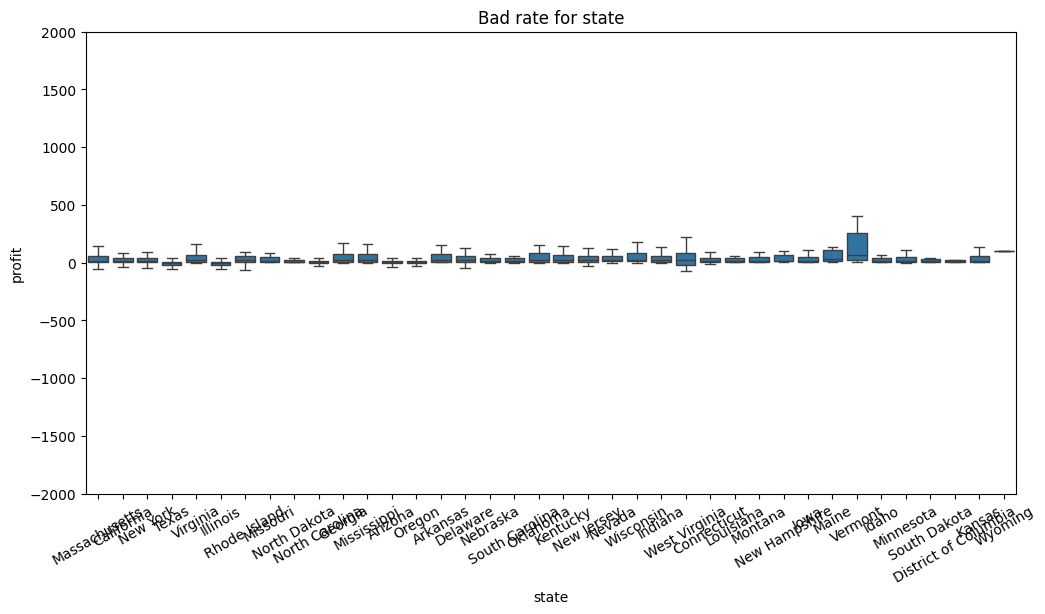

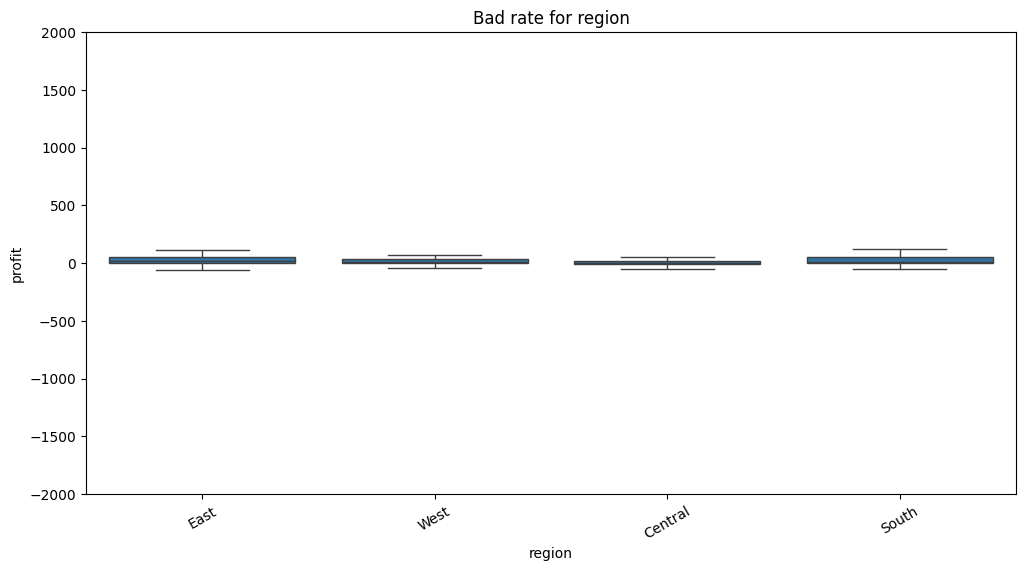

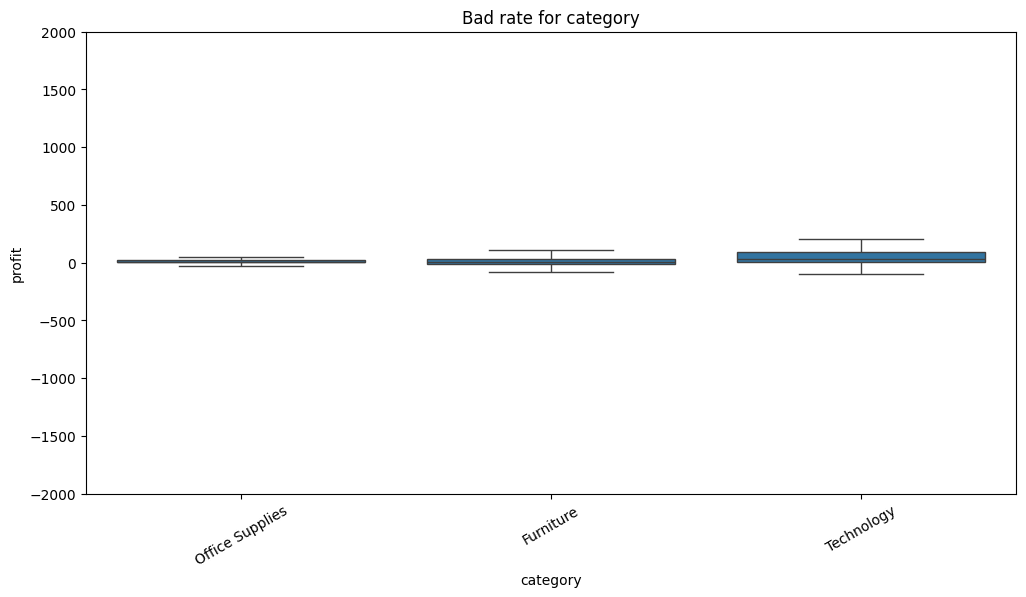

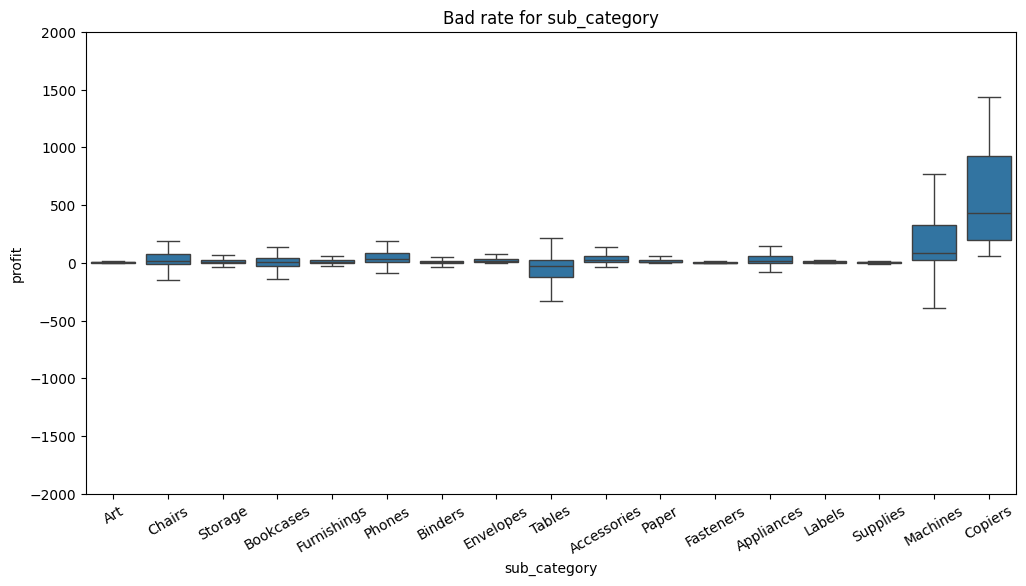

In [17]:
for feature in ['ship_mode', 'segment', 'state', 'region', 'category', 'sub_category']:
    plt.figure(figsize=(12, 6)) 
    #sns.barplot(data=X_train, x=feature, y='profit', estimator=np.mean, ci=None)
    sns.boxplot(data=X_train, x=feature, y='profit', fliersize=0)
    plt.xticks(rotation=30)
    plt.ylim(-2000, 2000)
    plt.title(f'Bad rate for {feature}')
    plt.show()

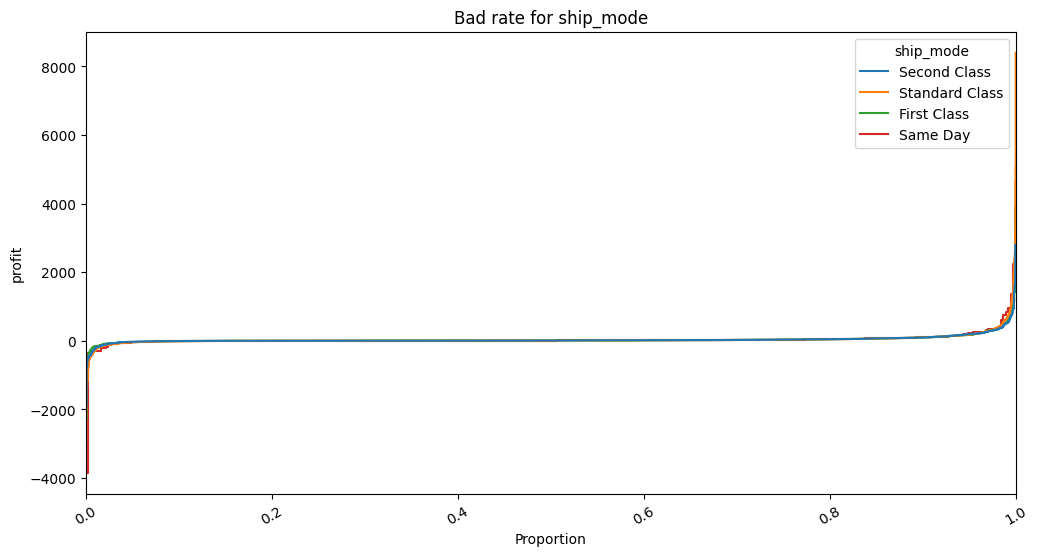

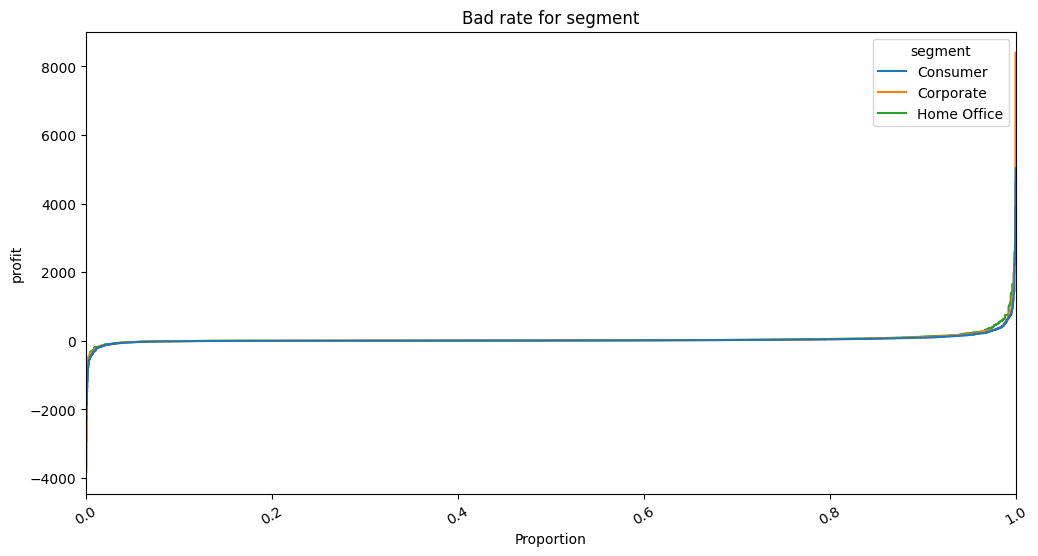

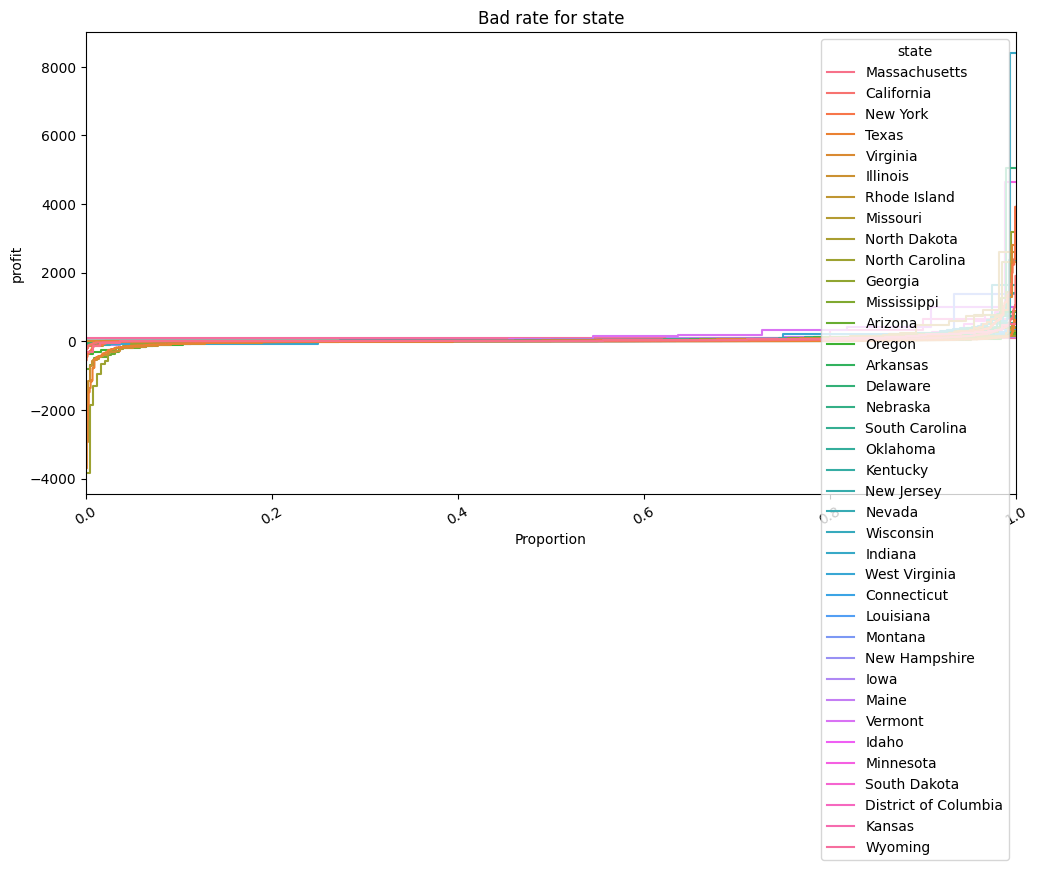

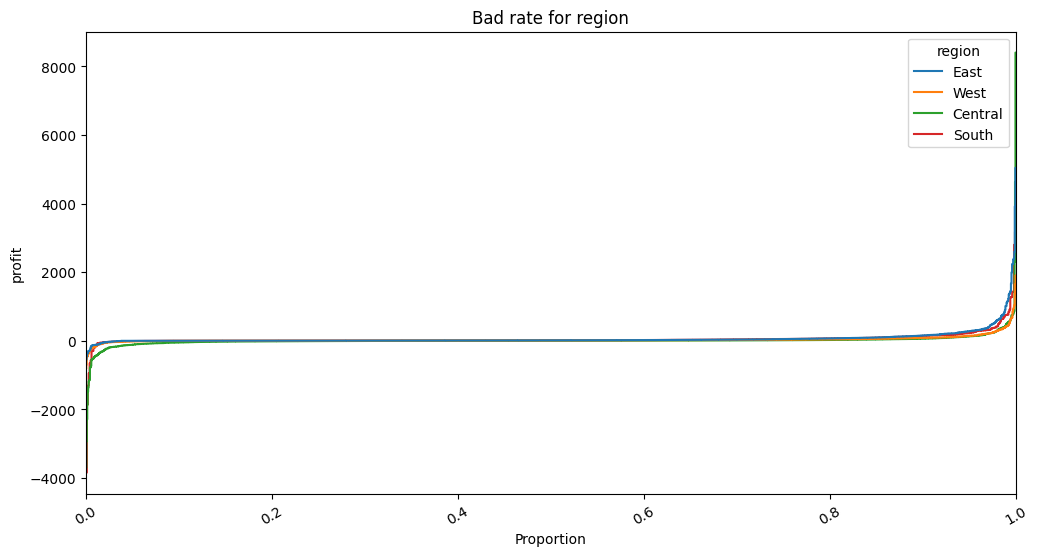

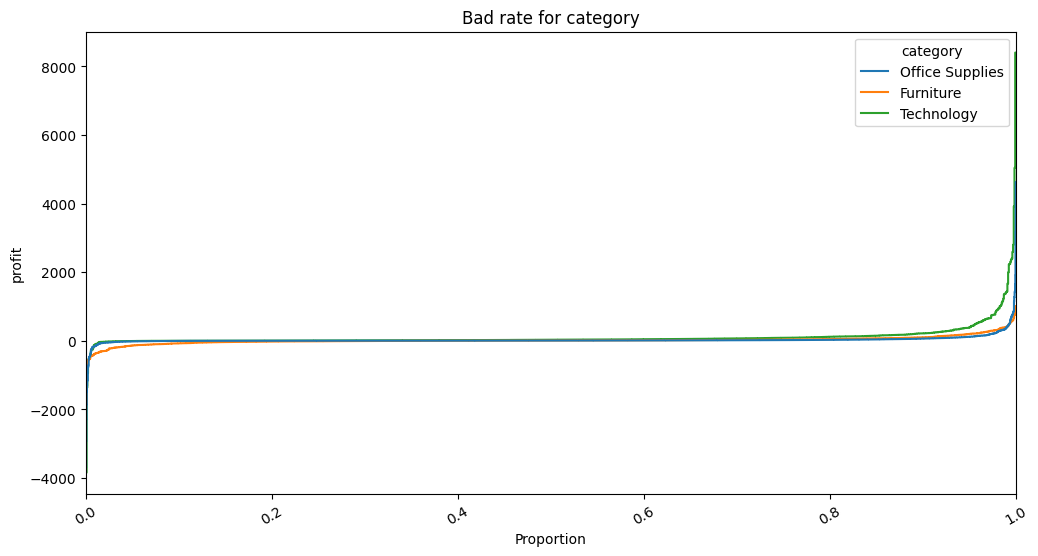

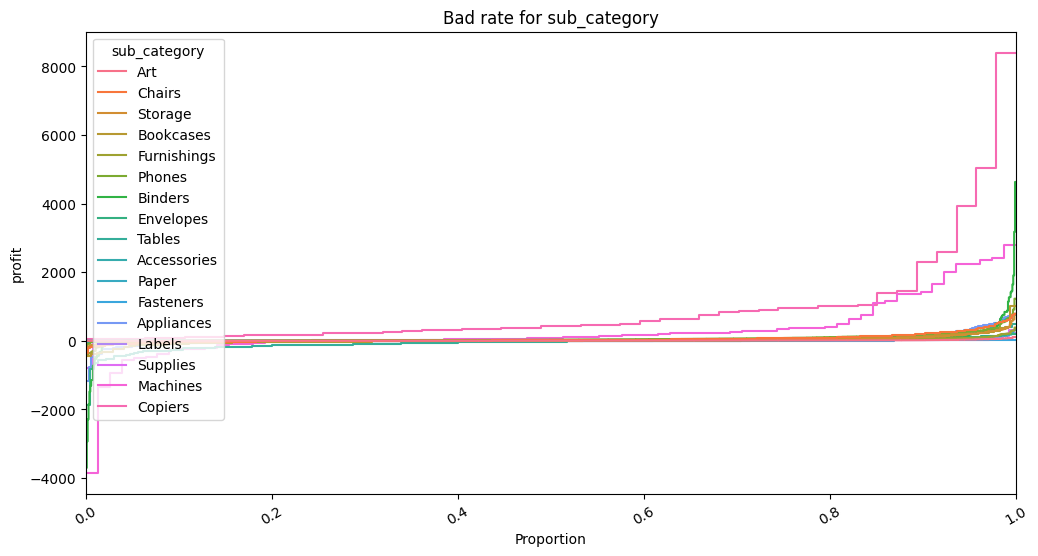

In [18]:
for feature in ['ship_mode', 'segment', 'state', 'region', 'category', 'sub_category']:
    plt.figure(figsize=(12, 6)) 
    sns.ecdfplot(data=X_train, y='profit', hue=feature)
    #sns.displot(data=X_train, x="profit", hue=feature, kind="kde", fill=True)
    plt.xticks(rotation=30)
    #plt.ylim(-100, 100)
    plt.title(f'Bad rate for {feature}')
    plt.show()